In [1]:
import numpy as np

from reader import *
from encoder import *

bunny_model = Reader.read_from_file('assets/bunny.obj')

baseline_encoder = BaselineEncoder()
baseline_compressed_model = baseline_encoder.encode(bunny_model)

import matplotlib.pyplot as plt


def print_statistics(compressed_model, name):
    print(f"{name} statistics:")
    print(f"- Bytes per triangle: {compressed_model.bits_per_triangle / 8:.2f}")
    print(f"- Bytes per vertex: {compressed_model.bits_per_vertex / 8:.2f}")
    print(f"- Compression rate: {baseline_compressed_model.bits_per_vertex / compressed_model.bits_per_vertex:.2f}")


print_statistics(baseline_compressed_model, "BaselineEncoder")

BaselineEncoder statistics:
- Bytes per triangle: 18.05
- Bytes per vertex: 35.82
- Compression rate: 1.00


In [2]:
gts_parallelogram_predictor_huffman_encoder = GTSParallelogramPredictor(pack_strip=Packing.RADIX_BINARY_TREE,
                                                                        entropy_encoder_type=Packing.HUFFMAN_ENCODER,
                                                                        enable_entropy_encoder_conditional_probabilities=False,
                                                                        verbose=True)
gts_parallelogram_predictor_huffman_encoder_compressed_model = gts_parallelogram_predictor_huffman_encoder.encode(
    bunny_model)

print_statistics(gts_parallelogram_predictor_huffman_encoder_compressed_model,
                 "GTSParallelogramPredictor(Huffman encoder)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.822
- Triangles strip average code bit length: 9.708
- Triangles strip (in bytes): 9458
- Quantized vertices entropy: 4.997038737229633
- Quantized vertices average code bit length: 5.152
- Quantized vertices (in bytes): 15059
GTSParallelogramPredictor(Huffman encoder) statistics:
- Bytes per triangle: 4.94
- Bytes per vertex: 9.81
- Compression rate: 3.65


In [3]:
gts_parallelogram_predictor_adaptive_huffman_encoder = GTSParallelogramPredictor(pack_strip=Packing.RADIX_BINARY_TREE,
                                                                        entropy_encoder_type=Packing.HUFFMAN_ENCODER,
                                                                        enable_entropy_encoder_conditional_probabilities=True,
                                                                        verbose=True)
gts_parallelogram_predictor_adaptive_huffman_encoder_compressed_model = gts_parallelogram_predictor_adaptive_huffman_encoder.encode(
    bunny_model)

print_statistics(gts_parallelogram_predictor_adaptive_huffman_encoder_compressed_model,
                 "GTSParallelogramPredictor(adaptive Huffman encoder)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.822
- Triangles strip average code bit length: 9.708
- Triangles strip (in bytes): 9458
- Quantized vertices entropy: 4.997038737229633
- Quantized vertices average code bit length: 5.118
- Quantized vertices (in bytes): 14960
GTSParallelogramPredictor(adaptive Huffman encoder) statistics:
- Bytes per triangle: 4.92
- Bytes per vertex: 9.77
- Compression rate: 3.67


In [4]:
gts_parallelogram_predictor_arithmetic_encoder = GTSParallelogramPredictor(pack_strip=Packing.RADIX_BINARY_TREE,
                                                                           entropy_encoder_type=Packing.ARITHMETIC_ENCODER,
                                                                           enable_entropy_encoder_conditional_probabilities=False,
                                                                           verbose=True)
gts_parallelogram_predictor_arithmetic_encoder_compressed_model = gts_parallelogram_predictor_arithmetic_encoder.encode(
    bunny_model)

print_statistics(gts_parallelogram_predictor_arithmetic_encoder_compressed_model,
                 "GTSParallelogramPredictor(arithmetic encoder)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.822
- Triangles strip average code bit length: 9.708
- Triangles strip (in bytes): 9458


100%|██████████| 23383/23383 [00:00<00:00, 194482.94it/s]

- Quantized vertices entropy: 4.997038737229633
- Quantized vertices average code bit length: 5.123
- Quantized vertices (in bytes): 14973
GTSParallelogramPredictor(arithmetic encoder) statistics:
- Bytes per triangle: 4.92
- Bytes per vertex: 9.77
- Compression rate: 3.67


In [5]:
gts_parallelogram_predictor_adaptive_arithmetic_encoder = GTSParallelogramPredictor(pack_strip=Packing.RADIX_BINARY_TREE,
                                                                           entropy_encoder_type=Packing.ARITHMETIC_ENCODER,
                                                                           enable_entropy_encoder_conditional_probabilities=True,
                                                                           verbose=True)
gts_parallelogram_predictor_adaptive_arithmetic_encoder_compressed_model = gts_parallelogram_predictor_adaptive_arithmetic_encoder.encode(
    bunny_model)

print_statistics(gts_parallelogram_predictor_adaptive_arithmetic_encoder_compressed_model,
                 "GTSParallelogramPredictor(adaptive arithmetic encoder)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.822
- Triangles strip average code bit length: 9.708
- Triangles strip (in bytes): 9458


100%|██████████| 23383/23383 [00:00<00:00, 27449.53it/s]

- Quantized vertices entropy: 4.997038737229633
- Quantized vertices average code bit length: 5.089
- Quantized vertices (in bytes): 14875
GTSParallelogramPredictor(adaptive arithmetic encoder) statistics:
- Bytes per triangle: 4.90
- Bytes per vertex: 9.73
- Compression rate: 3.68


In [6]:
packed_gts_encoder_radix_binary_tree_packing = PackedGTSQuantizator(pack_strip=Packing.RADIX_BINARY_TREE, verbose=True)
packed_gts_encoder_radix_binary_tree_packing_compressed_model = packed_gts_encoder_radix_binary_tree_packing.encode(
    bunny_model)

print_statistics(packed_gts_encoder_radix_binary_tree_packing_compressed_model,
                 "PackedGTSQuantizator(radix binary tree packing)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.822
- Triangles strip average code bit length: 9.708
- Triangles strip (in bytes): 9458
- Quantized vertices entropy: 11.520605177332085
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
PackedGTSQuantizator(radix binary tree packing) statistics:
- Bytes per triangle: 4.18
- Bytes per vertex: 8.29
- Compression rate: 4.32


In [7]:
encoder_no_packing = SimpleQuantizator(pack_strip=Packing.NONE, verbose=True)
encoder_no_packing_compressed_model = encoder_no_packing.encode(bunny_model)

print_statistics(encoder_no_packing_compressed_model, "SimpleQuantizator(no packing)")

SimpleQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 11.145
- Triangles strip average code bit length: 32.000
- Triangles strip (in bytes): 46344
- Quantized vertices entropy: 11.52060517733206
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
SimpleQuantizator(no packing) statistics:
- Bytes per triangle: 11.60
- Bytes per vertex: 23.03
- Compression rate: 1.56


In [8]:
encoder_fixed_packing = SimpleQuantizator(pack_strip=Packing.FIXED, verbose=True)
encoder_fixed_packing_model = encoder_fixed_packing.encode(bunny_model)

print_statistics(encoder_fixed_packing_model, "SimpleQuantizator(fixed packing)")

SimpleQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 11.145
- Triangles strip average code bit length: 12.000
- Triangles strip (in bytes): 17379
- Quantized vertices entropy: 11.52060517733206
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
SimpleQuantizator(fixed packing) statistics:
- Bytes per triangle: 5.77
- Bytes per vertex: 11.46
- Compression rate: 3.13


In [9]:
encoder_binary_range_partitioning_packing = SimpleQuantizator(pack_strip=Packing.BINARY_RANGE_PARTITIONING,
                                                              verbose=True)
encoder_binary_range_partitioning_packing_compressed_model = encoder_binary_range_partitioning_packing.encode(
    bunny_model)

print_statistics(encoder_binary_range_partitioning_packing_compressed_model,
                 "SimpleQuantizator(binary range partitioning packing)")

SimpleQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 11.145
- Triangles strip average code bit length: 11.709
- Triangles strip (in bytes): 16958
- Quantized vertices entropy: 11.52060517733206
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
SimpleQuantizator(binary range partitioning packing) statistics:
- Bytes per triangle: 5.69
- Bytes per vertex: 11.29
- Compression rate: 3.17


In [10]:
encoder_binary_range_partitioning_packing = SimpleQuantizator(pack_strip=Packing.BINARY_RANGE_PARTITIONING,
                                                              allow_reorder=True, verbose=True)
encoder_binary_range_partitioning_packing_compressed_model = encoder_binary_range_partitioning_packing.encode(
    bunny_model)

print_statistics(encoder_binary_range_partitioning_packing_compressed_model,
                 "SimpleQuantizator(binary range partitioning packing, reordered)")

SimpleQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 11.145
- Triangles strip average code bit length: 11.465
- Triangles strip (in bytes): 16604
- Quantized vertices entropy: 11.520605177332088
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
SimpleQuantizator(binary range partitioning packing, reordered) statistics:
- Bytes per triangle: 5.62
- Bytes per vertex: 11.15
- Compression rate: 3.21


In [11]:
encoder_radix_binary_tree_packing = SimpleQuantizator(pack_strip=Packing.RADIX_BINARY_TREE, verbose=True)
encoder_radix_binary_tree_packing_compressed_model = encoder_radix_binary_tree_packing.encode(bunny_model)

print_statistics(encoder_radix_binary_tree_packing_compressed_model, "SimpleQuantizator(radix binary tree packing)")

SimpleQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 11.145
- Triangles strip average code bit length: 11.363
- Triangles strip (in bytes): 16456
- Quantized vertices entropy: 11.52060517733206
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
SimpleQuantizator(radix binary tree packing) statistics:
- Bytes per triangle: 5.59
- Bytes per vertex: 11.09
- Compression rate: 3.23


In [12]:
encoder_radix_binary_tree_packing = SimpleQuantizator(pack_strip=Packing.RADIX_BINARY_TREE, allow_reorder=True,
                                                      verbose=True)
encoder_radix_binary_tree_packing_compressed_model = encoder_radix_binary_tree_packing.encode(bunny_model)

print_statistics(encoder_radix_binary_tree_packing_compressed_model,
                 "SimpleQuantizator(radix binary tree packing, reordered)")

SimpleQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 11.145
- Triangles strip average code bit length: 11.208
- Triangles strip (in bytes): 16232
- Quantized vertices entropy: 11.5206051773321
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
SimpleQuantizator(radix binary tree packing, reordered) statistics:
- Bytes per triangle: 5.54
- Bytes per vertex: 11.00
- Compression rate: 3.26


In [13]:
gts_encoder_fixed_packing = GTSQuantizator(pack_strip=Packing.FIXED, verbose=True)
gts_encoder_fixed_packing_compressed_model = gts_encoder_fixed_packing.encode(bunny_model)

print_statistics(gts_encoder_fixed_packing_compressed_model, "GTSQuantizator(fixed packing)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.132
- Triangles strip average code bit length: 13.000
- Triangles strip (in bytes): 12665
- Quantized vertices entropy: 11.52060517733206
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
GTSQuantizator(fixed packing) statistics:
- Bytes per triangle: 4.82
- Bytes per vertex: 9.57
- Compression rate: 3.74


In [14]:
gts_encoder_radix_binary_tree_packing = GTSQuantizator(pack_strip=Packing.RADIX_BINARY_TREE, verbose=True)
gts_encoder_radix_binary_tree_packing_compressed_model = gts_encoder_radix_binary_tree_packing.encode(bunny_model)

print_statistics(gts_encoder_radix_binary_tree_packing_compressed_model, "GTSQuantizator(radix binary tree packing)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.132
- Triangles strip average code bit length: 12.355
- Triangles strip (in bytes): 12037
- Quantized vertices entropy: 11.52060517733206
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
GTSQuantizator(radix binary tree packing) statistics:
- Bytes per triangle: 4.70
- Bytes per vertex: 9.32
- Compression rate: 3.84


In [15]:
packed_gts_encoder_fixed_packing = PackedGTSQuantizator(pack_strip=Packing.FIXED, verbose=True)
packed_gts_encoder_fixed_packing_compressed_model = packed_gts_encoder_fixed_packing.encode(bunny_model)

print_statistics(packed_gts_encoder_fixed_packing_compressed_model, "PackedGTSQuantizator(fixed packing)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.822
- Triangles strip average code bit length: 10.146
- Triangles strip (in bytes): 9885
- Quantized vertices entropy: 11.520605177332085
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
PackedGTSQuantizator(fixed packing) statistics:
- Bytes per triangle: 4.26
- Bytes per vertex: 8.46
- Compression rate: 4.23


In [16]:
packed_gts_encoder_radix_binary_tree_packing = PackedGTSQuantizator(pack_strip=Packing.RADIX_BINARY_TREE, verbose=True)
packed_gts_encoder_radix_binary_tree_packing_compressed_model = packed_gts_encoder_radix_binary_tree_packing.encode(
    bunny_model)

print_statistics(packed_gts_encoder_radix_binary_tree_packing_compressed_model,
                 "PackedGTSQuantizator(radix binary tree packing)")

GTSQuantizator verbose statistics:
- Header (in bytes): 32
- Triangles strip entropy: 12.822
- Triangles strip average code bit length: 9.708
- Triangles strip (in bytes): 9458
- Quantized vertices entropy: 11.520605177332085
- Quantized vertices average code bit length: 12.002
- Quantized vertices (in bytes): 11265
PackedGTSQuantizator(radix binary tree packing) statistics:
- Bytes per triangle: 4.18
- Bytes per vertex: 8.29
- Compression rate: 4.32


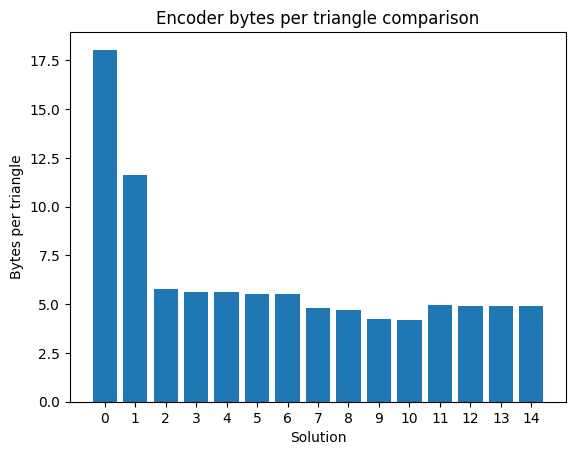

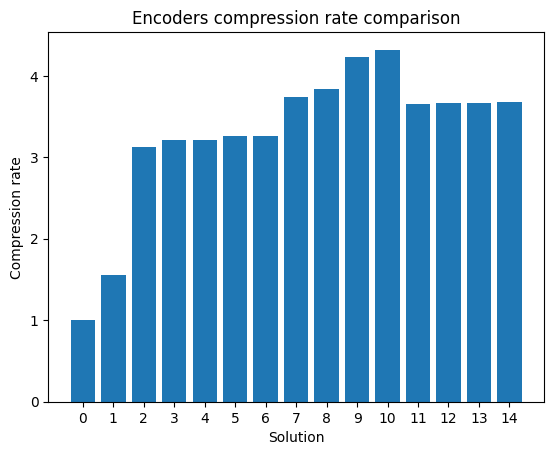

In [19]:

def show_and_save_bar_plots(compressed_models: List[CompressedModel]):
    bytes_per_triangle = [model.bits_per_triangle / 8 for model in compressed_models]
    compression_rate = [baseline_compressed_model.bits_per_vertex / model.bits_per_vertex for model in
                        compressed_models]

    # Create the histogram
    plt.bar(list(range(len(bytes_per_triangle))), bytes_per_triangle)

    # Add title and labels
    plt.title('Encoder bytes per triangle comparison')
    plt.xlabel('Solution')
    plt.xticks(list(range(len(bytes_per_triangle))))
    plt.ylabel('Bytes per triangle')

    # Save the histogram as an image
    plt.savefig('images/bytes_per_triangle_bar_plot.png')  # Save as PNG file
    plt.show()  # Display the plot

    # Create the histogram
    plt.bar(list(range(len(compression_rate))), compression_rate)

    # Add title and labels
    plt.title('Encoders compression rate comparison')
    plt.xlabel('Solution')
    plt.xticks(list(range(len(compression_rate))))
    plt.ylabel('Compression rate')

    # Save the histogram as an image
    plt.savefig('images/compression_rate_bar_plot.png')  # Save as PNG file
    plt.show()  # Display the plot
    

show_and_save_bar_plots([baseline_compressed_model, encoder_no_packing_compressed_model, encoder_fixed_packing_model,
                         encoder_binary_range_partitioning_packing_compressed_model,
                         encoder_binary_range_partitioning_packing_compressed_model,
                         encoder_radix_binary_tree_packing_compressed_model,
                         encoder_radix_binary_tree_packing_compressed_model, gts_encoder_fixed_packing_compressed_model,
                         gts_encoder_radix_binary_tree_packing_compressed_model,
                         packed_gts_encoder_fixed_packing_compressed_model,
                         packed_gts_encoder_radix_binary_tree_packing_compressed_model,
                         gts_parallelogram_predictor_huffman_encoder_compressed_model,
                         gts_parallelogram_predictor_adaptive_huffman_encoder_compressed_model,
                         gts_parallelogram_predictor_arithmetic_encoder_compressed_model,
                         gts_parallelogram_predictor_adaptive_arithmetic_encoder_compressed_model,
                         ])